# LOAN CREDIT RISK ASSESSMENT - ANALYSIS PART 2

In [1]:
pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Load the dataset - previous_application.csv
prev_app = pd.read_csv(r'C:\Users\sweth\OneDrive\Documents\Projects\OESON\Python/previous_application.csv')
prev_app

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [4]:
# To display basic information about the dataset
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [5]:
# To preview the first few rows of the dataset
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# To check the shape of the dataset (number of rows and columns)
print("Shape of the dataset:", prev_app.shape)

Shape of the dataset: (1670214, 37)


In [7]:
# To get summary statistics for numerical columns
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## Data Cleaning - previous_application

In [8]:
# To check for missing values in each column
missing_values_prev = prev_app.isnull().sum()
missing_values_prev 

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [9]:
# To calculate percentage of missing values for each column
missing_values_prev_percentage = (missing_values_prev / len(prev_app))*100 
missing_values_prev_percentage

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [10]:
# Identify columns where the missing percentage is greater than 50%
columns_to_drop = missing_values_prev_percentage[missing_values_prev_percentage > 50].index
columns_to_drop

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'],
      dtype='object')

In [11]:
# Calculate the threshold as 50% of the number of rows and drop columns with more than 50% missing values
threshold = len(prev_app) * 0.5
prev_app_cleaned = prev_app.dropna(axis=1, thresh=threshold)

In [12]:
prev_app_cleaned.shape

(1670214, 33)

In [13]:
# Ensure prev_app_cleaned is a copy of the original DataFrame
prev_app_cleaned = prev_app_cleaned.copy()

In [14]:
# Imputing missing values for remaining columns
# For numerical columns, using mean
prev_app_cleaned['AMT_ANNUITY'].fillna(prev_app_cleaned['AMT_ANNUITY'].mean(), inplace=True)
prev_app_cleaned['AMT_CREDIT'].fillna(prev_app_cleaned['AMT_CREDIT'].mean(), inplace=True)
prev_app_cleaned['AMT_GOODS_PRICE'].fillna(prev_app_cleaned['AMT_GOODS_PRICE'].mean(), inplace=True)
prev_app_cleaned['CNT_PAYMENT'].fillna(prev_app_cleaned['CNT_PAYMENT'].mean(), inplace=True)
prev_app_cleaned['DAYS_FIRST_DRAWING'].fillna(prev_app_cleaned['DAYS_FIRST_DRAWING'].mean(), inplace=True)
prev_app_cleaned['DAYS_FIRST_DUE'].fillna(prev_app_cleaned['DAYS_FIRST_DUE'].mean(), inplace=True)
prev_app_cleaned['DAYS_LAST_DUE_1ST_VERSION'].fillna(prev_app_cleaned['DAYS_LAST_DUE_1ST_VERSION'].mean(), inplace=True)
prev_app_cleaned['DAYS_LAST_DUE'].fillna(prev_app_cleaned['DAYS_LAST_DUE'].mean(), inplace=True)
prev_app_cleaned['DAYS_TERMINATION'].fillna(prev_app_cleaned['DAYS_TERMINATION'].mean(), inplace=True)
prev_app_cleaned['NFLAG_INSURED_ON_APPROVAL'].fillna(prev_app_cleaned['NFLAG_INSURED_ON_APPROVAL'].mean(), inplace=True)

C:\Users\sweth\AppData\Local\Temp\ipykernel_41860\504860202.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prev_app_cleaned['AMT_ANNUITY'].fillna(prev_app_cleaned['AMT_ANNUITY'].mean(), inplace=True)
C:\Users\sweth\AppData\Local\Temp\ipykernel_41860\504860202.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [15]:
# For categorical columns, using mode 
prev_app_cleaned['NAME_TYPE_SUITE'].fillna(prev_app_cleaned['NAME_TYPE_SUITE'].mode()[0], inplace=True)
prev_app_cleaned['PRODUCT_COMBINATION'].fillna(prev_app_cleaned['PRODUCT_COMBINATION'].mode()[0], inplace=True)

C:\Users\sweth\AppData\Local\Temp\ipykernel_41860\2689473238.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prev_app_cleaned['NAME_TYPE_SUITE'].fillna(prev_app_cleaned['NAME_TYPE_SUITE'].mode()[0], inplace=True)
C:\Users\sweth\AppData\Local\Temp\ipykernel_41860\2689473238.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

In [16]:
# To recheck the number of missing values
prev_app_cleaned.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_

In [17]:
# To Identify duplicate rows
Duplicates = prev_app_cleaned.duplicated()
Duplicates 

0          False
1          False
2          False
3          False
4          False
           ...  
1670209    False
1670210    False
1670211    False
1670212    False
1670213    False
Length: 1670214, dtype: bool

In [18]:
# To Count the number of duplicate rows
num_Duplicates = Duplicates.sum()
num_Duplicates

np.int64(0)

##### - No Duplicate values found

In [19]:
# To drop the unnecessary columns from the DataFrame
prev_app_cleaned = prev_app_cleaned.drop(columns=['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT'])

In [20]:
prev_app_cleaned.shape

(1670214, 30)

In [21]:
# To check the datatypes in the dataframe
prev_app_cleaned.dtypes

SK_ID_PREV                     int64
SK_ID_CURR                     int64
NAME_CONTRACT_TYPE            object
AMT_ANNUITY                  float64
AMT_APPLICATION              float64
AMT_CREDIT                   float64
AMT_GOODS_PRICE              float64
NFLAG_LAST_APPL_IN_DAY         int64
NAME_CASH_LOAN_PURPOSE        object
NAME_CONTRACT_STATUS          object
DAYS_DECISION                  int64
NAME_PAYMENT_TYPE             object
CODE_REJECT_REASON            object
NAME_TYPE_SUITE               object
NAME_CLIENT_TYPE              object
NAME_GOODS_CATEGORY           object
NAME_PORTFOLIO                object
NAME_PRODUCT_TYPE             object
CHANNEL_TYPE                  object
SELLERPLACE_AREA               int64
NAME_SELLER_INDUSTRY          object
CNT_PAYMENT                  float64
NAME_YIELD_GROUP              object
PRODUCT_COMBINATION           object
DAYS_FIRST_DRAWING           float64
DAYS_FIRST_DUE               float64
DAYS_LAST_DUE_1ST_VERSION    float64
D

In [22]:
# Converting to suitable datatypes
# Convert selected object columns to category
categorical_columns = [
    'NAME_CONTRACT_TYPE',
    'NAME_CASH_LOAN_PURPOSE',    
    'NAME_CONTRACT_STATUS', 
    'CODE_REJECT_REASON',          
    'NAME_TYPE_SUITE',
    'NAME_PAYMENT_TYPE', 
    'NAME_CLIENT_TYPE', 
    'NAME_GOODS_CATEGORY',
    'NAME_PORTFOLIO',
    'NAME_PRODUCT_TYPE',
    'NAME_SELLER_INDUSTRY'
]

prev_app_cleaned[categorical_columns] = prev_app_cleaned[categorical_columns].astype('category')

In [23]:
# To verify the changes
prev_app_cleaned.dtypes

SK_ID_PREV                      int64
SK_ID_CURR                      int64
NAME_CONTRACT_TYPE           category
AMT_ANNUITY                   float64
AMT_APPLICATION               float64
AMT_CREDIT                    float64
AMT_GOODS_PRICE               float64
NFLAG_LAST_APPL_IN_DAY          int64
NAME_CASH_LOAN_PURPOSE       category
NAME_CONTRACT_STATUS         category
DAYS_DECISION                   int64
NAME_PAYMENT_TYPE            category
CODE_REJECT_REASON           category
NAME_TYPE_SUITE              category
NAME_CLIENT_TYPE             category
NAME_GOODS_CATEGORY          category
NAME_PORTFOLIO               category
NAME_PRODUCT_TYPE            category
CHANNEL_TYPE                   object
SELLERPLACE_AREA                int64
NAME_SELLER_INDUSTRY         category
CNT_PAYMENT                   float64
NAME_YIELD_GROUP               object
PRODUCT_COMBINATION            object
DAYS_FIRST_DRAWING            float64
DAYS_FIRST_DUE                float64
DAYS_LAST_DU

In [24]:
# To check data integrity
prev_app_cleaned.describe(include='all')

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1670214,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1670214,1670214,...,1670214,1.670214e+06,1670214,1670214,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,25,4,...,11,NaN,5,17,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,NaN,NaN,NaN,NaN,NaN,XAP,Approved,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,747553,NaN,NaN,NaN,NaN,NaN,922661,1036781,...,855720,NaN,517215,286336,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.923089e+06,2.783572e+05,NaN,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,9.964675e-01,NaN,NaN,...,NaN,1.605408e+01,NaN,NaN,3.422099e+05,1.382627e+04,3.376777e+04,7.658240e+04,8.199234e+04,3.325702e-01
std,5.325980e+05,1.028148e+05,NaN,1.303122e+04,2.927798e+05,3.185745e+05,2.766123e+05,5.932963e-02,NaN,NaN,...,NaN,1.284184e+01,NaN,NaN,6.870279e+04,5.597596e+04,8.256519e+04,1.156280e+05,1.184530e+05,3.640312e-01
min,1.000001e+06,1.000010e+05,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,...,NaN,0.000000e+00,NaN,NaN,-2.922000e+03,-2.892000e+03,-2.801000e+03,-2.889000e+03,-2.874000e+03,0.000000e+00
25%,1.461857e+06,1.893290e+05,NaN,7.547096e+03,1.872000e+04,2.416050e+04,6.750000e+04,1.000000e+00,NaN,NaN,...,NaN,1.000000e+01,NaN,NaN,3.422099e+05,-1.020000e+03,-5.800000e+02,-7.340000e+02,-6.950000e+02,0.000000e+00
50%,1.923110e+06,2.787145e+05,NaN,1.544967e+04,7.104600e+04,8.054100e+04,1.728000e+05,1.000000e+00,NaN,NaN,...,NaN,1.200000e+01,NaN,NaN,3.652430e+05,-2.750000e+02,4.310000e+02,7.658240e+04,8.199234e+04,3.325702e-01
75%,2.384280e+06,3.675140e+05,NaN,1.682403e+04,1.803600e+05,2.164185e+05,2.278473e+05,1.000000e+00,NaN,NaN,...,NaN,1.605408e+01,NaN,NaN,3.652430e+05,1.382627e+04,3.376777e+04,7.658240e+04,8.199234e+04,3.325702e-01


#### Checking Outliers using Boxplots

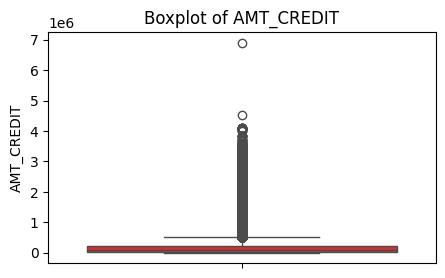

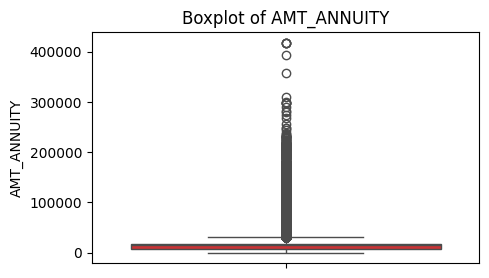

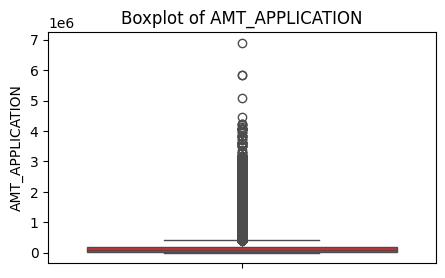

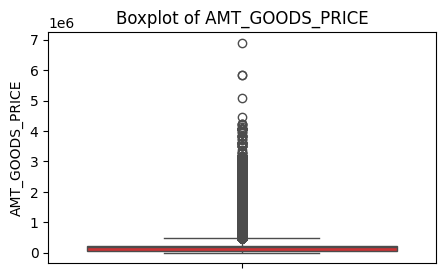

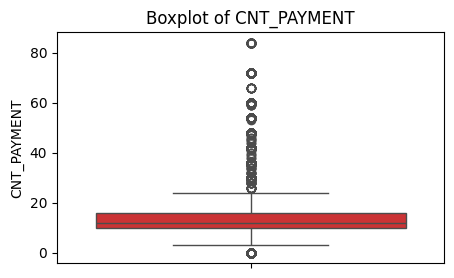

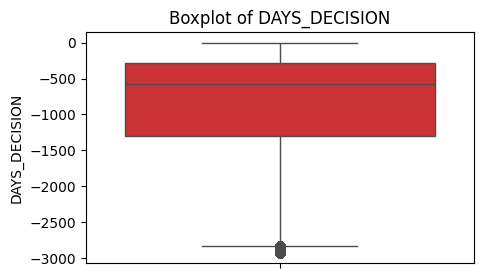

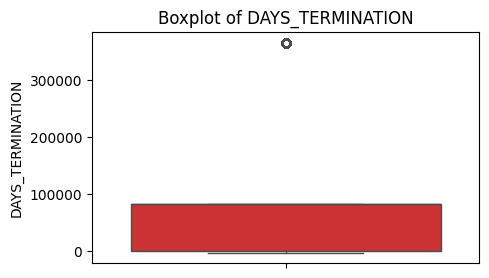

In [25]:
# To Check for outliers using boxplots
import seaborn as sns
import matplotlib.pyplot as plt

# Listing the specific numerical columns to check
columns_to_check = [
    'AMT_CREDIT', 
    'AMT_ANNUITY', 
    'AMT_APPLICATION', 
    'AMT_GOODS_PRICE',
    'CNT_PAYMENT', 
    'DAYS_DECISION', 
    'DAYS_TERMINATION'
]

# Plot boxplots for each column in separate figures
sns.set_palette("Set1")
for col in columns_to_check:
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=prev_app_cleaned[col], color=sns.color_palette("Set1")[0])
    plt.title(f'Boxplot of {col}')
    plt.show()


#### All the above columns displays data points outside the whiskers of the boxplot, so they are considered as potential outliers.

### Checking Outliers using Interquartile method (IQR)

In [26]:
# Outlier detection through Interquartile method (IQR)
columns = [ 'AMT_CREDIT', 
    'AMT_ANNUITY', 
    'AMT_APPLICATION', 
    'AMT_GOODS_PRICE',
    'CNT_PAYMENT', 
    'DAYS_DECISION', 
    'DAYS_TERMINATION'
]

for col in columns:
    Q1 = prev_app_cleaned[col].quantile(0.25)
    Q3 = prev_app_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    # Print the number of outliers detected
    num_outliers = ((prev_app_cleaned[col] > upper_bound) | (prev_app_cleaned[col] < lower_bound)).sum()
    print(f"Number of outliers in '{col}': {num_outliers}")

Number of outliers in 'AMT_CREDIT': 179989
Number of outliers in 'AMT_ANNUITY': 162620
Number of outliers in 'AMT_APPLICATION': 208019
Number of outliers in 'AMT_GOODS_PRICE': 154856
Number of outliers in 'CNT_PAYMENT': 344916
Number of outliers in 'DAYS_DECISION': 17571
Number of outliers in 'DAYS_TERMINATION': 225913


### Alternative Method

In [27]:
# Outlier detection through Interquartile Range (IQR) method

# For AMT_CREDIT
Q1 = prev_app_cleaned['AMT_CREDIT'].quantile(0.25)
Q3 = prev_app_cleaned['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = prev_app_cleaned[(prev_app_cleaned['AMT_CREDIT'] < lower_bound) | (prev_app_cleaned['AMT_CREDIT'] > upper_bound)]

print(f"IQR: {IQR}")
print(f"Lower_Bound: {lower_bound}")
print(f"Upper_Bound: {upper_bound}")
print(f"Number of outliers in 'AMT_CREDIT': {len(outliers)}")

IQR: 192258.0
Lower_Bound: -264226.5
Upper_Bound: 504805.5
Number of outliers in 'AMT_CREDIT': 179989


##### There are 179,989 outliers in AMT_CREDIT, mainly on the higher end, due to a negative lower bound.

In [28]:
# For AMT_ANNUITY
Q1 = prev_app_cleaned['AMT_ANNUITY'].quantile(0.25)
Q3 = prev_app_cleaned['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = prev_app_cleaned[(prev_app_cleaned['AMT_ANNUITY'] < lower_bound) | (prev_app_cleaned['AMT_ANNUITY'] > upper_bound)]

print(f"IQR: {IQR}")
print(f"Lower_Bound: {lower_bound}")
print(f"Upper_Bound: {upper_bound}")
print(f"Number of outliers in 'AMT_ANNUITY': {len(outliers)}")

IQR: 9276.930000000002
Lower_Bound: -6368.298750000004
Upper_Bound: 30739.421250000007
Number of outliers in 'AMT_ANNUITY': 162620


##### There are 162,620 rows in the dataset where AMT_ANNUITY is either below the lower bound or above the upper bound.

In [29]:
# For AMT_ANNUITY
Q1 = prev_app_cleaned['AMT_APPLICATION'].quantile(0.25)
Q3 = prev_app_cleaned['AMT_APPLICATION'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = prev_app_cleaned[(prev_app_cleaned['AMT_APPLICATION'] < lower_bound) | (prev_app_cleaned['AMT_APPLICATION'] > upper_bound)]

print(f"IQR: {IQR}")
print(f"Lower_Bound: {lower_bound}")
print(f"Upper_Bound: {upper_bound}")
print(f"Number of outliers in 'AMT_APPLICATION': {len(outliers)}")

IQR: 161640.0
Lower_Bound: -223740.0
Upper_Bound: 422820.0
Number of outliers in 'AMT_APPLICATION': 208019


##### This indicates that 208,019 rows in the dataset have AMT_APPLICATION values that are either below the lower bound or above the upper bound and the negative lower bound suggests that the distribution of AMT_APPLICATION might be heavily skewed or has extreme low-end values.

In [30]:
# CNT_PAYMENT 
Q1 = prev_app_cleaned['CNT_PAYMENT'].quantile(0.25)
Q3 = prev_app_cleaned['CNT_PAYMENT'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = prev_app_cleaned[(prev_app_cleaned['CNT_PAYMENT'] < lower_bound) | (prev_app_cleaned['CNT_PAYMENT'] > upper_bound)]

print(f"IQR: {IQR}")
print(f"Lower_Bound: {lower_bound}")
print(f"Upper_Bound: {upper_bound}")
print(f"Number of outliers in 'CNT_PAYMENT': {len(outliers)}")

IQR: 6.0540815603274005
Lower_Bound: 0.9188776595088992
Upper_Bound: 25.135203900818503
Number of outliers in 'CNT_PAYMENT': 344916


##### There are 344,916 rows in the dataset where the CNT_PAYMENT value is either below the lower bound (0.92) or above the upper bound (25.14).

### Capping method for handling outliers

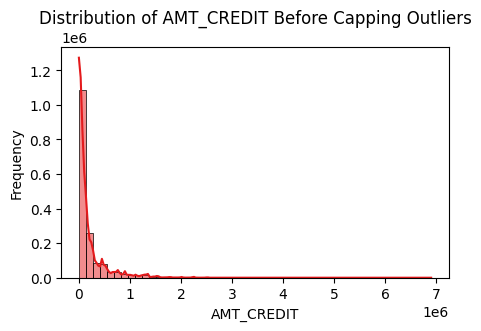

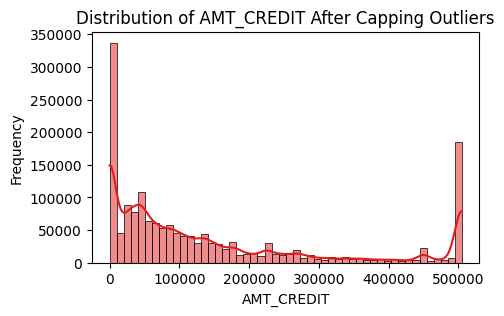

In [31]:
# Plot the distribution before capping
plt.figure(figsize=(5, 3))
sns.histplot(prev_app_cleaned['AMT_CREDIT'], bins=50, kde=True)
plt.title('Distribution of AMT_CREDIT Before Capping Outliers')
plt.xlabel('AMT_CREDIT')
plt.ylabel('Frequency')
plt.show()

# Capping the AMT_CREDIT at the upper bound
upper_bound = 504805.5  # Use the calculated upper bound from your analysis
prev_app_cleaned['AMT_CREDIT'] = np.where(prev_app_cleaned['AMT_CREDIT'] > upper_bound, upper_bound, prev_app_cleaned['AMT_CREDIT'])

# Plot the distribution after capping
plt.figure(figsize=(5, 3))
sns.histplot(prev_app_cleaned['AMT_CREDIT'], bins=50, kde=True)
plt.title('Distribution of AMT_CREDIT After Capping Outliers')
plt.xlabel('AMT_CREDIT')
plt.ylabel('Frequency')
plt.show()

##### Capping the outliers in AMT_CREDIT eliminated extreme high values, resulting in a more uniformly distributed dataset with a sharp concentration around the capped upper limit.

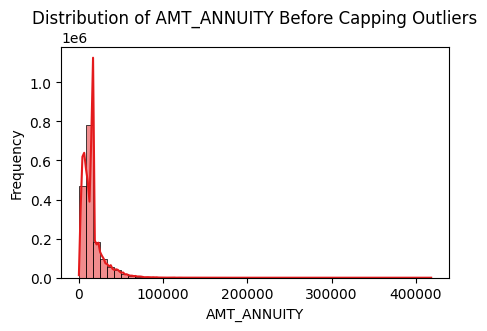

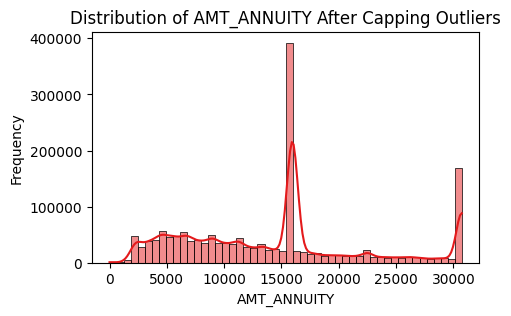

In [32]:
# Plot the distribution before capping
plt.figure(figsize=(5, 3))
sns.histplot(prev_app_cleaned['AMT_ANNUITY'], bins=50, kde=True)
plt.title('Distribution of AMT_ANNUITY Before Capping Outliers')
plt.xlabel('AMT_ANNUITY')
plt.ylabel('Frequency')
plt.show()

# Capping the AMT_ANNUITY at the upper bound
upper_bound = 30739.42  # Use the calculated upper bound from your analysis
prev_app_cleaned['AMT_ANNUITY'] = np.where(prev_app_cleaned['AMT_ANNUITY'] > upper_bound, upper_bound, prev_app_cleaned['AMT_ANNUITY'])

# Plot the distribution after capping
plt.figure(figsize=(5, 3))
sns.histplot(prev_app_cleaned['AMT_ANNUITY'], bins=50, kde=True)
plt.title('Distribution of AMT_ANNUITY After Capping Outliers')
plt.xlabel('AMT_ANNUITY')
plt.ylabel('Frequency')
plt.show()


##### Capping the outliers in AMT_ANNUITY reduced the extreme values, resulting in a more normalized and concentrated distribution around the upper bound.

## Exploratory Data Analysis (previous_application)

### Distributions of Numerical Features

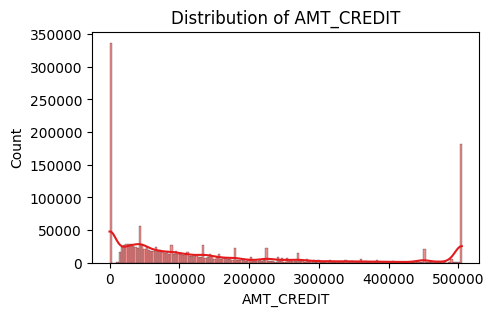

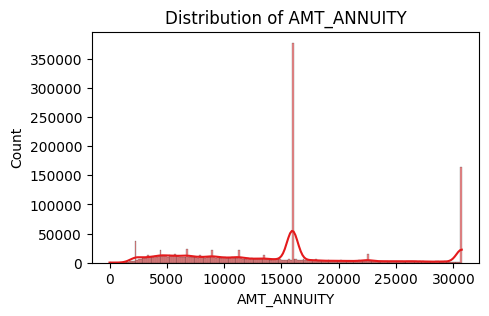

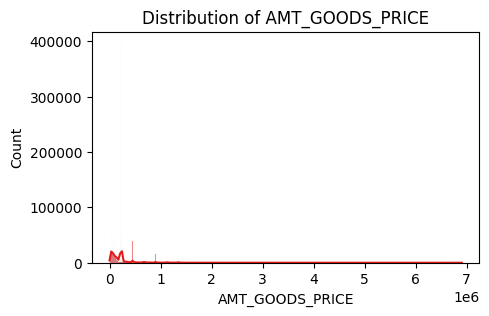

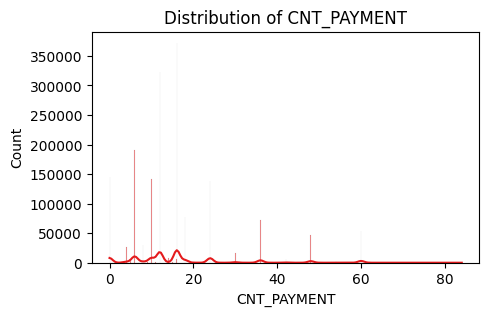

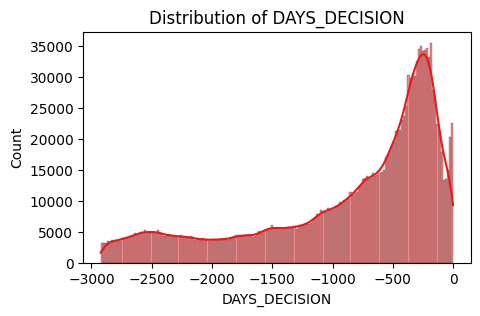

In [33]:
# To find distribution of Numerical Variables
# List of numerical features
numerical_features = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT','DAYS_DECISION']
colors = sns.color_palette('Set1')
for feature in numerical_features:
    plt.figure(figsize=(5, 3))
    sns.histplot(prev_app_cleaned[feature], kde=True, color=colors[0])
    plt.title(f'Distribution of {feature}')
    plt.show()

### Plot for Categorical Columns

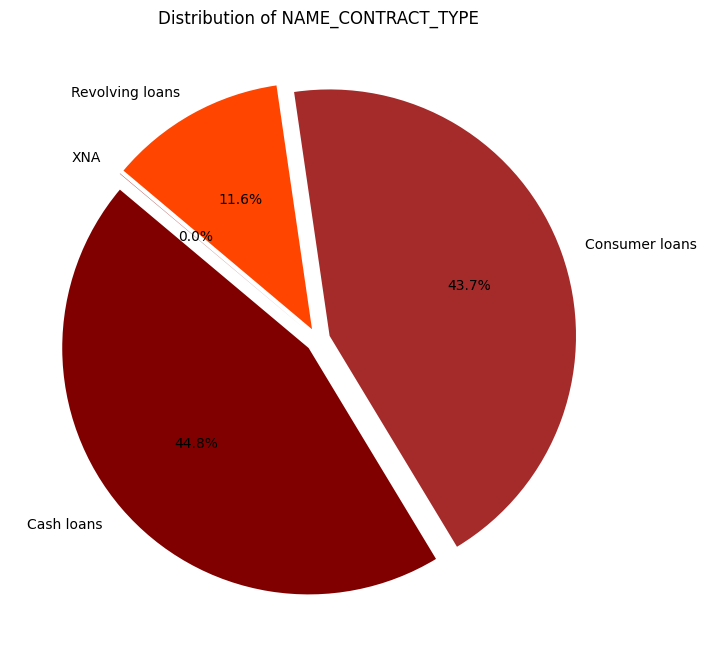

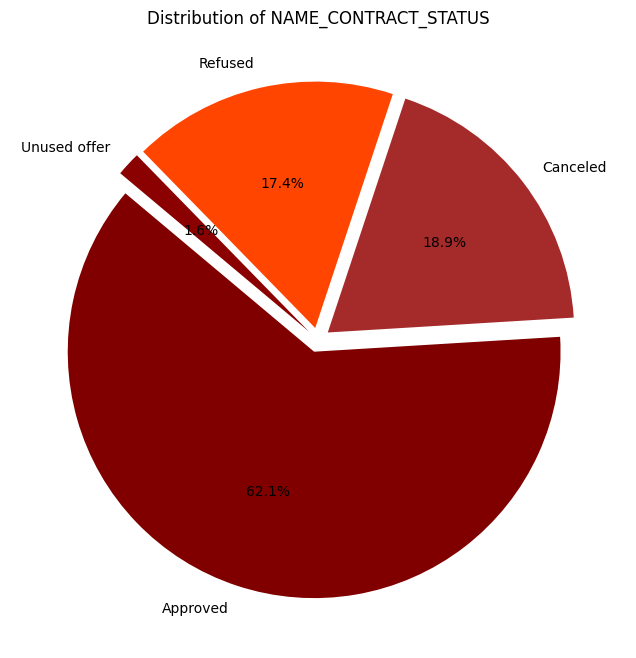

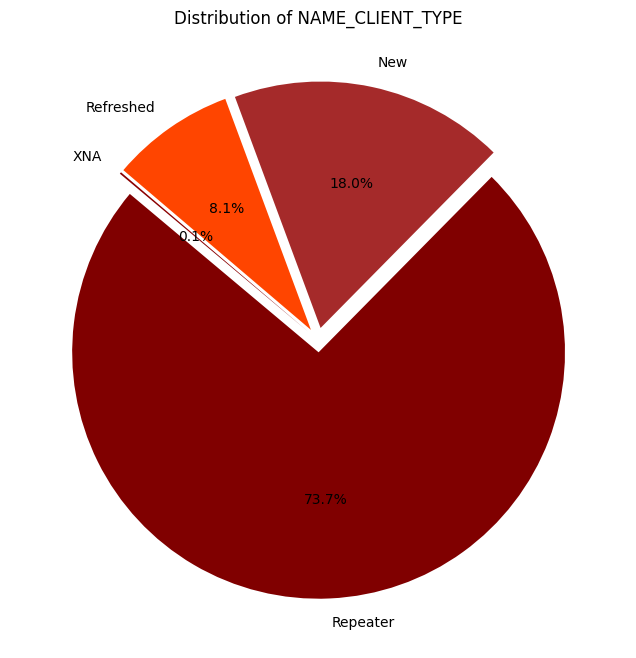

In [34]:

# List of categorical features to analyse
categorical_features = ['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE']

# Define the colors for the pie chart (reddish shades)
colors = ['#800000', '#A52A2A', '#FF4500', '#8B0000']  

# Loop through each categorical feature
for feature in categorical_features:
    # Assuming 'prev_app_cleaned' is your DataFrame and 'feature' is the column name
    sizes = prev_app_cleaned[feature].value_counts(normalize=True) * 100  # Percentages
    labels = prev_app_cleaned[feature].value_counts().index
    
    # Create explode values to separate slices
    explode = [0.05] * len(labels)
    
    # Plotting the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, colors=colors[:len(labels)], explode=explode, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {feature}')
    plt.show()



C:\Users\sweth\AppData\Local\Temp\ipykernel_41860\216256259.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=feature, data=prev_app_cleaned, order=sorted_data.index, palette=[colors[i % len(colors)]])
C:\Users\sweth\AppData\Local\Temp\ipykernel_41860\216256259.py:10: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=feature, data=prev_app_cleaned, order=sorted_data.index, palette=[colors[i % len(colors)]])


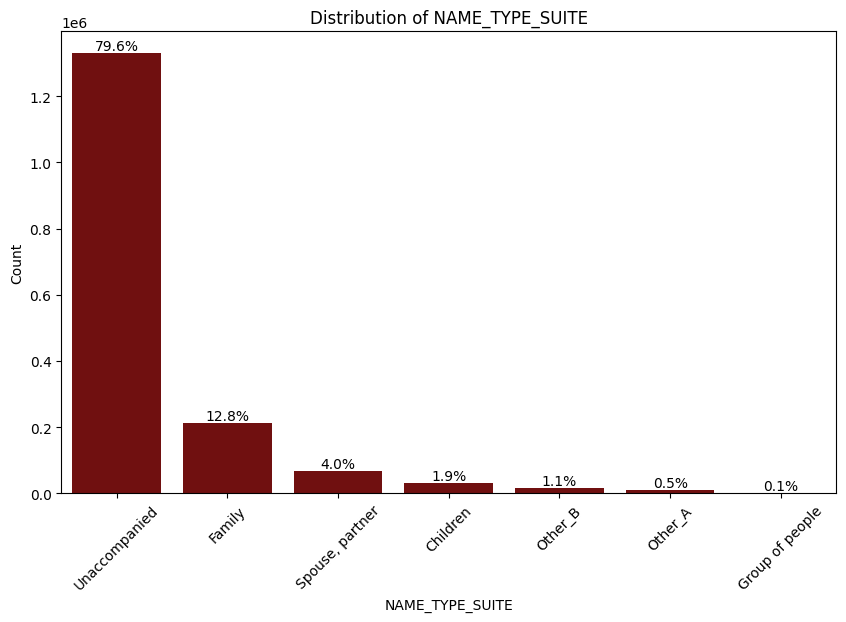

C:\Users\sweth\AppData\Local\Temp\ipykernel_41860\216256259.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=feature, data=prev_app_cleaned, order=sorted_data.index, palette=[colors[i % len(colors)]])
C:\Users\sweth\AppData\Local\Temp\ipykernel_41860\216256259.py:10: UserWarning: 
The palette list has fewer values (1) than needed (9) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x=feature, data=prev_app_cleaned, order=sorted_data.index, palette=[colors[i % len(colors)]])


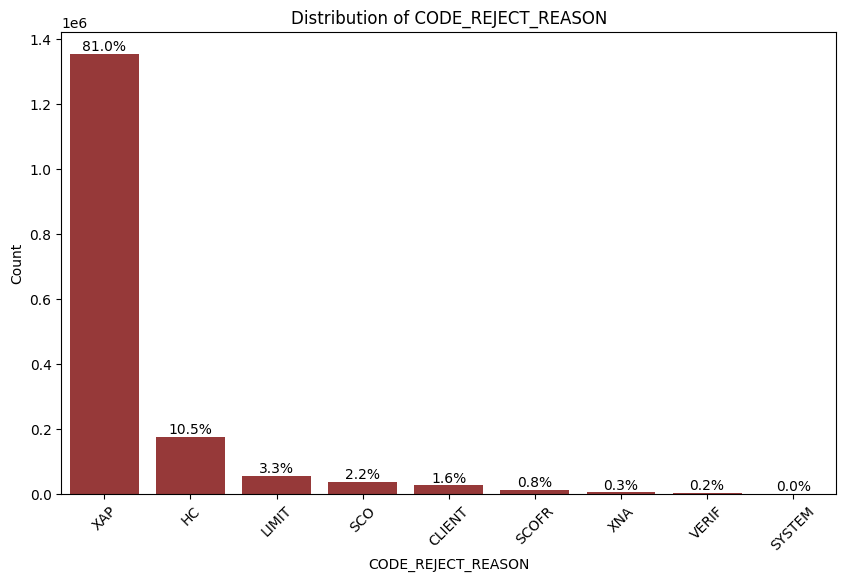

In [35]:
# List of categorical features to analyze
categorical_features = ['NAME_TYPE_SUITE', 'CODE_REJECT_REASON' ]

for i, feature in enumerate(categorical_features):
    plt.figure(figsize=(10, 6))
    
    # Calculate counts and sort them in descending order
    sorted_data = prev_app_cleaned[feature].value_counts().sort_values(ascending=False)
    
    ax = sns.countplot(x=feature, data=prev_app_cleaned, order=sorted_data.index, palette=[colors[i % len(colors)]])
    total = len(prev_app_cleaned[feature])
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.title(f'Distribution of {feature}')
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.xticks(rotation=45)  # Rotate x-labels if necessary
    plt.show()


## Bivariate Analysis

### Scatter Plot for Two Numerical Variables

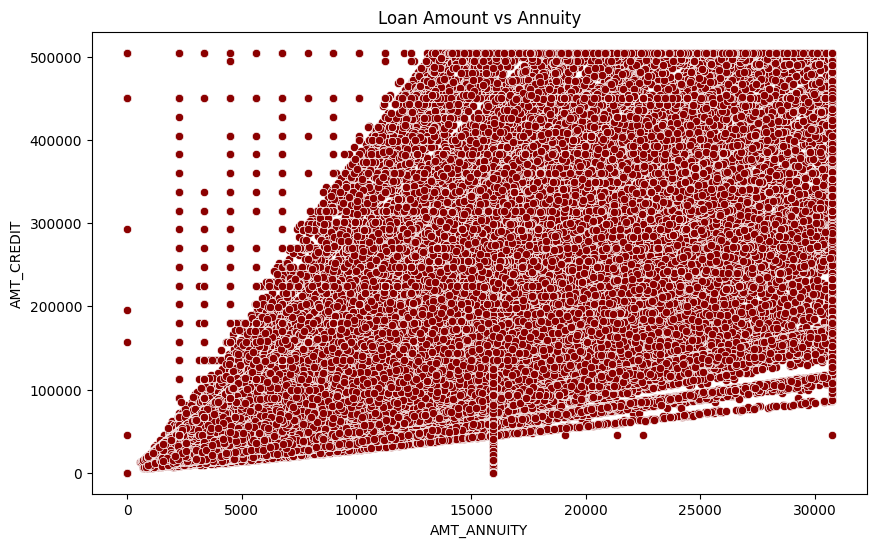

In [36]:
# Scatterplot between two numerical features - AMT_CREDIT vs. AMT_ANNUITY
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_ANNUITY', y='AMT_CREDIT', data=prev_app_cleaned,color='darkred')
plt.title('Loan Amount vs Annuity')
plt.show()


C:\Users\sweth\AppData\Local\Temp\ipykernel_41860\3034043775.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_amt_credit = prev_app_cleaned.groupby('NAME_CONTRACT_STATUS')['AMT_CREDIT'].mean().sort_values(ascending=False).index


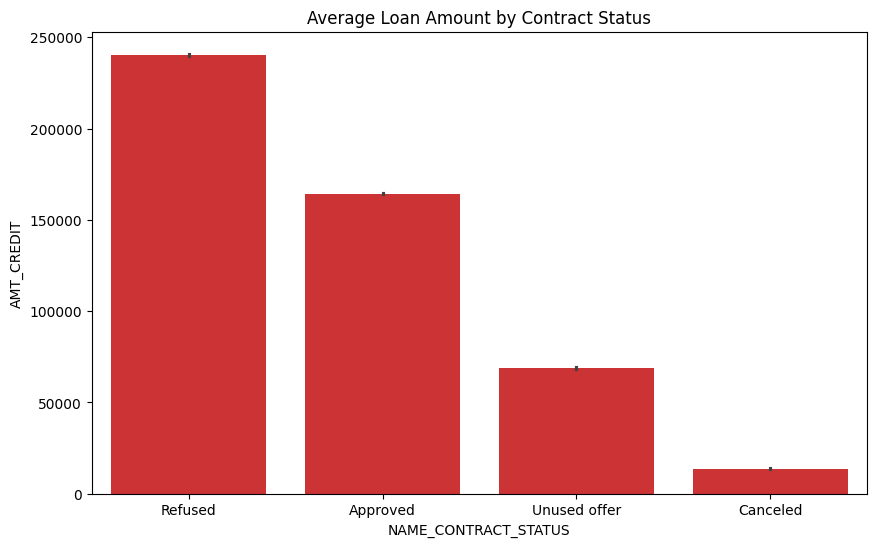

In [37]:
# Average AMT_CREDIT by Client Type
mean_amt_credit = prev_app_cleaned.groupby('NAME_CONTRACT_STATUS')['AMT_CREDIT'].mean().sort_values(ascending=False).index

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='NAME_CONTRACT_STATUS', y='AMT_CREDIT', data=prev_app_cleaned, order=mean_amt_credit)
plt.title('Average Loan Amount by Contract Status')
plt.show()

## Multivariate Analysis

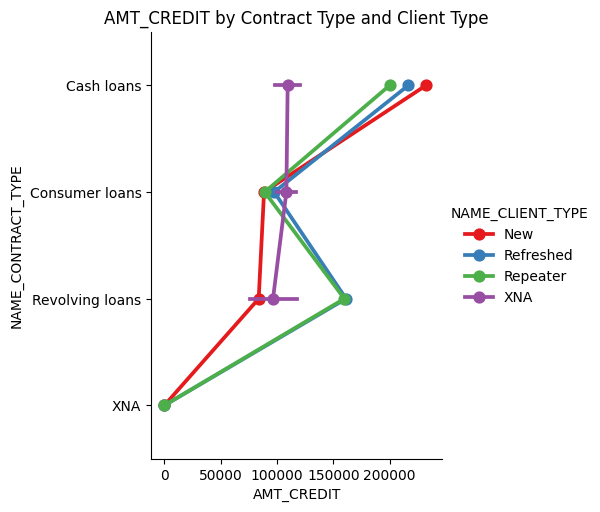

In [38]:
# Categorical plot for AMT_CREDIT across different contract types and client type
sns.catplot(x='AMT_CREDIT', y='NAME_CONTRACT_TYPE', hue='NAME_CLIENT_TYPE', kind='point', data=prev_app_cleaned)
plt.title('AMT_CREDIT by Contract Type and Client Type')
plt.show()

C:\Users\sweth\AppData\Local\Temp\ipykernel_41860\2535537798.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = prev_app_cleaned.groupby(['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS'])['AMT_CREDIT'].sum().unstack()


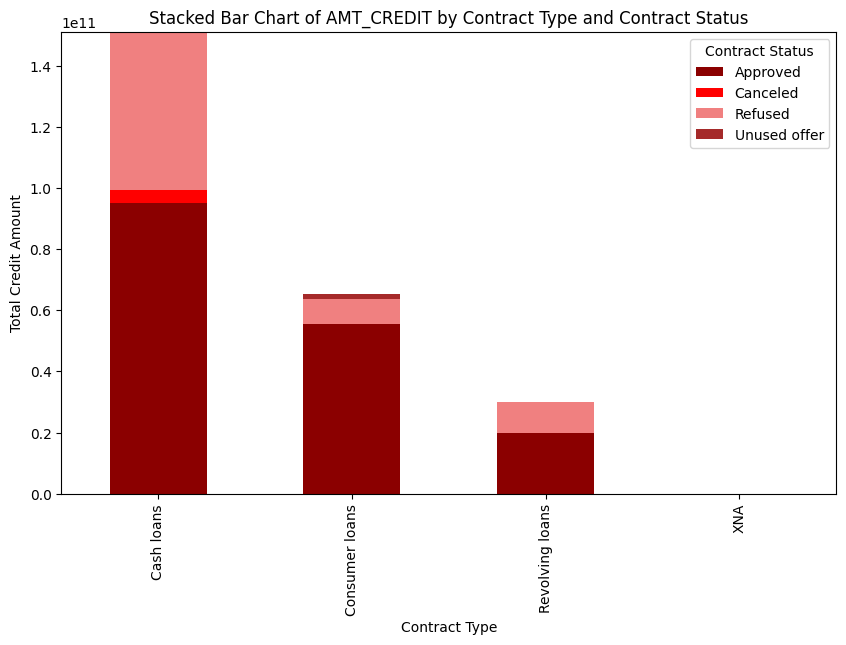

In [39]:
# Grouping the data by NAME_CONTRACT_TYPE and NAME_CONTRACT_STATUS, and summing the AMT_CREDIT
grouped_data = prev_app_cleaned.groupby(['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS'])['AMT_CREDIT'].sum().unstack()

# Plotting the stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['darkred', 'red', 'lightcoral', 'brown'])

# Adding title and labels
plt.title('Stacked Bar Chart of AMT_CREDIT by Contract Type and Contract Status')
plt.xlabel('Contract Type')
plt.ylabel('Total Credit Amount')
plt.legend(title='Contract Status')

# Show the plot
plt.show()

In [40]:
# To restore the app_data_cleaned that was previously stored using the %store command
%store -r app_data_cleaned

C:\Users\sweth\AppData\Roaming\Python\Python312\site-packages\IPython\extensions\storemagic.py:148: UserWarning: This is now an optional IPython functionality, using autorestore/app_data_cleaned requires you to install the `pickleshare` library.
  obj = db["autorestore/" + arg]


In [41]:
# Loading the two datasets 
prev_app = pd.read_csv(r'C:\Users\sweth\OneDrive\Documents\Projects\OESON\Python/previous_application.csv')
app_data = pd.read_csv(r'C:\Users\sweth\OneDrive\Documents\Projects\OESON\Python\application_data.csv')


In [43]:

# loading a previously saved Python object from a file using the pickle module.import pickle
# Load cleaned app_data previously saved
import pickle   
with open('app_data_cleaned.pkl', 'rb') as f:
    app_data_cleaned = pickle.load(f)

In [44]:
print(type(prev_app_cleaned))

<class 'pandas.core.frame.DataFrame'>


In [45]:
print(type(app_data_cleaned))

<class 'pandas.core.frame.DataFrame'>


## Merging Two Datasets

In [46]:
# Merging the cleaned application data with the cleaned previous application data on 'SK_ID_CURR' using an inner join
merged_data = pd.merge(app_data_cleaned, prev_app_cleaned, on='SK_ID_CURR', how='inner')
merged_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.000000,-565.000000,125.000000,-25.000000,-17.000000,0.00000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.000000,-716.000000,-386.000000,-536.000000,-527.000000,1.00000
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.000000,-797.000000,-647.000000,-647.000000,-639.000000,0.00000
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.000000,-2310.000000,-1980.000000,-1980.000000,-1976.000000,1.00000
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.000000,-784.000000,-694.000000,-724.000000,-714.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413641,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,24.0,middle,Cash X-Sell: middle,365243.000000,-618.000000,72.000000,-558.000000,-528.000000,1.00000
1413642,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Connectivity,0.0,XNA,Card Street,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.33257
1413643,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,60.0,low_normal,Cash Street: low,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.33257
1413644,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,36.0,low_normal,Cash X-Sell: low,365243.000000,-756.000000,294.000000,-66.000000,-64.000000,0.00000


In [47]:
# To preview the first few rows of the Merged dataset
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [48]:
# To display basic information about the Merged dataset
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413646 entries, 0 to 1413645
Data columns (total 74 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413646 non-null  int64   
 1   TARGET                       1413646 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413646 non-null  category
 3   CODE_GENDER                  1413646 non-null  category
 4   FLAG_OWN_CAR                 1413646 non-null  category
 5   FLAG_OWN_REALTY              1413646 non-null  category
 6   CNT_CHILDREN                 1413646 non-null  int64   
 7   AMT_INCOME_TOTAL             1413646 non-null  float64 
 8   AMT_CREDIT_x                 1413646 non-null  float64 
 9   AMT_ANNUITY_x                1413646 non-null  float64 
 10  AMT_GOODS_PRICE_x            1413646 non-null  float64 
 11  NAME_TYPE_SUITE_x            1413646 non-null  category
 12  NAME_INCOME_TYPE            

In [49]:
merged_data.shape

(1413646, 74)

In [50]:
# Descriptive statistics
merged_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06,...,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06,1.413646e+06
mean,2.784832e+05,8.655632e-02,4.048758e-01,1.733153e+05,5.875603e+05,2.701712e+04,5.276527e+05,2.074942e-02,-1.632123e+04,6.870480e+04,...,9.964319e-01,-8.803712e+02,3.149935e+02,1.605247e+01,3.422383e+05,1.362293e+04,3.347101e+04,7.663277e+04,8.221022e+04,3.313617e-01
std,1.028121e+05,2.811839e-01,7.173327e-01,1.985770e+05,3.849227e+05,1.395089e+04,3.531037e+05,1.334706e-02,4.344516e+03,1.452798e+05,...,5.962675e-02,7.835434e+02,7.695231e+03,1.288706e+01,6.898765e+04,5.564418e+04,8.244616e+04,1.162603e+05,1.192367e+05,3.653257e-01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,-2.520100e+04,-1.791200e+04,...,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00,-2.922000e+03,-2.892000e+03,-2.801000e+03,-2.889000e+03,-2.874000e+03,0.000000e+00
25%,1.893670e+05,0.000000e+00,0.000000e+00,1.125000e+05,2.700000e+05,1.682100e+04,2.385000e+05,1.003200e-02,-1.998000e+04,-2.829000e+03,...,1.000000e+00,-1.313000e+03,-1.000000e+00,1.000000e+01,3.422099e+05,-1.032000e+03,-5.950000e+02,-7.450000e+02,-7.040000e+02,0.000000e+00
50%,2.789920e+05,0.000000e+00,0.000000e+00,1.575000e+05,5.084955e+05,2.492550e+04,4.500000e+05,1.885000e-02,-1.604400e+04,-1.281000e+03,...,1.000000e+00,-5.820000e+02,4.000000e+00,1.200000e+01,3.652430e+05,-2.860000e+02,3.910000e+02,7.658240e+04,8.199234e+04,3.325702e-01
75%,3.675610e+05,0.000000e+00,1.000000e+00,2.070000e+05,8.079840e+05,3.454200e+04,6.795000e+05,2.866300e-02,-1.273900e+04,-2.840000e+02,...,1.000000e+00,-2.710000e+02,8.500000e+01,1.800000e+01,3.652430e+05,1.382627e+04,3.376777e+04,7.658240e+04,8.199234e+04,3.325702e-01
max,4.562550e+05,1.000000e+00,1.900000e+01,1.170000e+08,4.050000e+06,2.250000e+05,4.050000e+06,7.250800e-02,-7.489000e+03,3.652430e+05,...,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01,3.652430e+05,3.652430e+05,3.652430e+05,3.652430e+05,3.652430e+05,1.000000e+00


In [51]:
merged_data.isnull().sum()

SK_ID_CURR                   0
TARGET                       0
NAME_CONTRACT_TYPE_x         0
CODE_GENDER                  0
FLAG_OWN_CAR                 0
                            ..
DAYS_FIRST_DUE               0
DAYS_LAST_DUE_1ST_VERSION    0
DAYS_LAST_DUE                0
DAYS_TERMINATION             0
NFLAG_INSURED_ON_APPROVAL    0
Length: 74, dtype: int64

## Exploratory Data Analysis (Merged Dataset)

###  Application Approval Trends

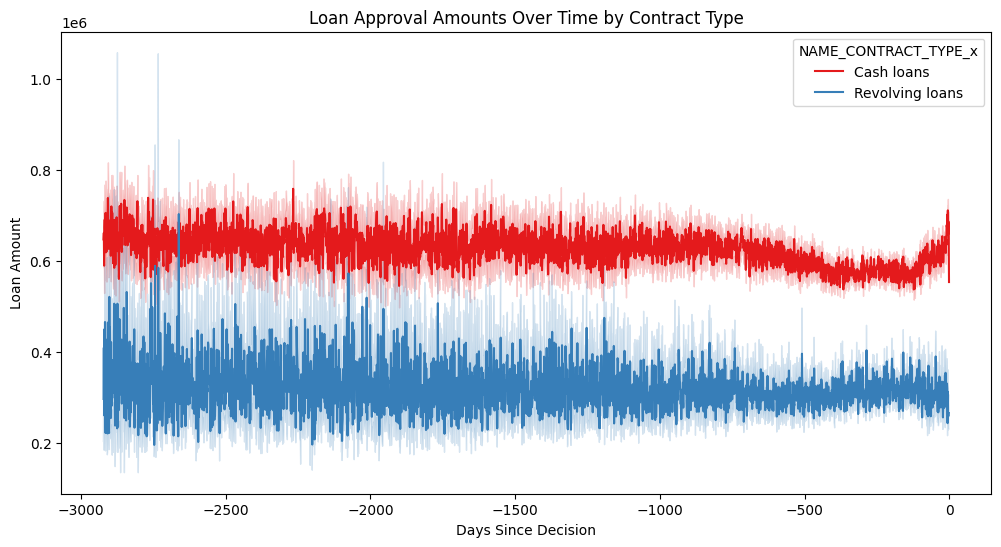

In [52]:
# Application Approval Trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='DAYS_DECISION', y='AMT_CREDIT_x', hue='NAME_CONTRACT_TYPE_x', data=merged_data)
plt.title('Loan Approval Amounts Over Time by Contract Type')
plt.xlabel('Days Since Decision')
plt.ylabel('Loan Amount')
plt.show()

### Comparison of Loan Default Rates by Contract and Client History


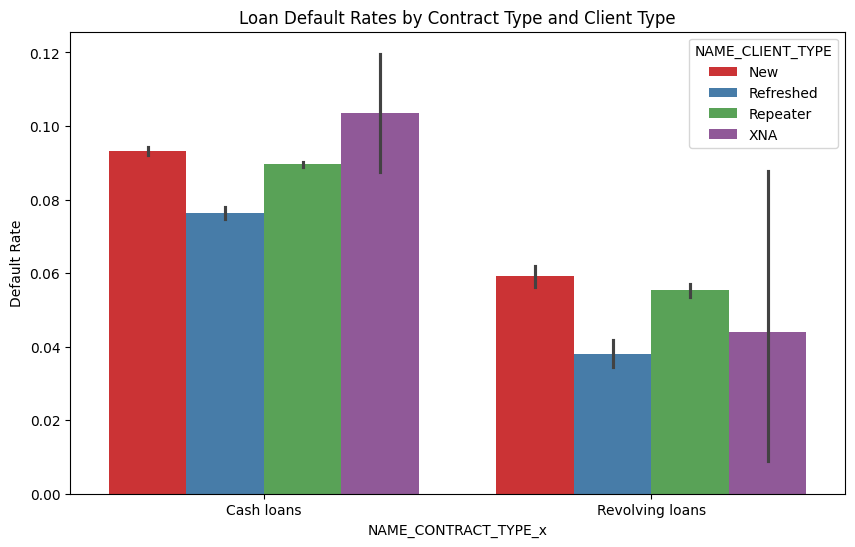

In [53]:
# Loan Default Rates by Previous Application Features
plt.figure(figsize=(10, 6))
sns.barplot(x='NAME_CONTRACT_TYPE_x', y='TARGET', hue='NAME_CLIENT_TYPE', data=merged_data)
plt.title('Loan Default Rates by Contract Type and Client Type')
plt.ylabel('Default Rate')
plt.show()

### Risk Analysis: Loan Amount vs Repayment History

C:\Users\sweth\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


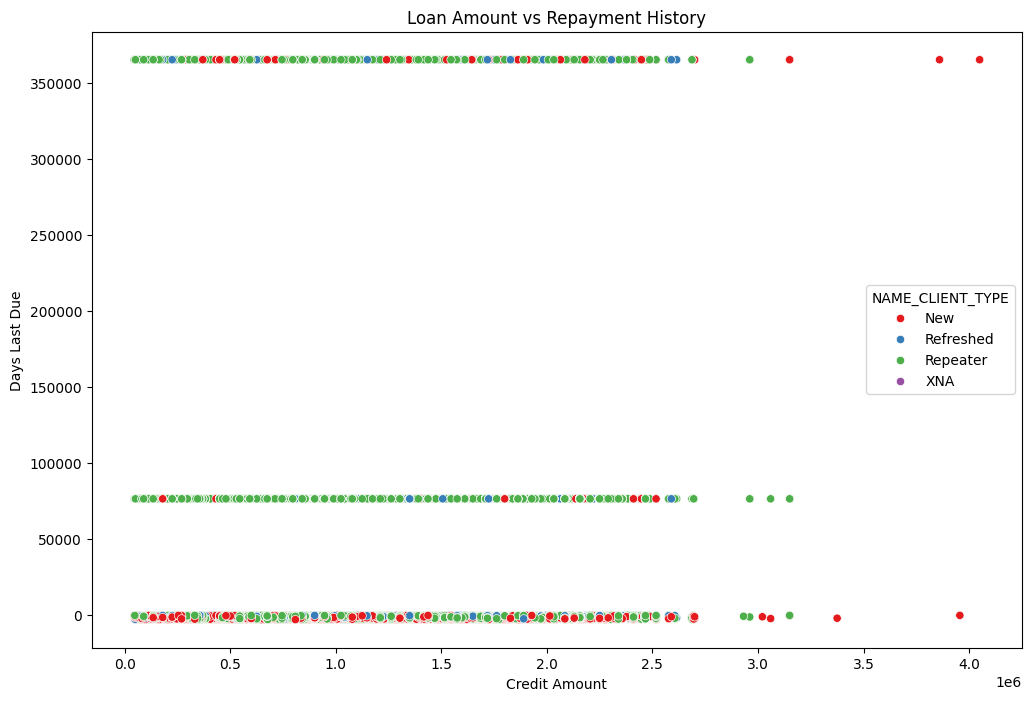

In [54]:
# Scatter plot of loan amount vs. repayment history (DAYS_LAST_DUE in previous applications)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='AMT_CREDIT_x', y='DAYS_LAST_DUE', hue='NAME_CLIENT_TYPE', data=merged_data)
plt.title('Loan Amount vs Repayment History')
plt.xlabel('Credit Amount')
plt.ylabel('Days Last Due')
plt.show()


### Distribution of Credit Amounts by Contract Status

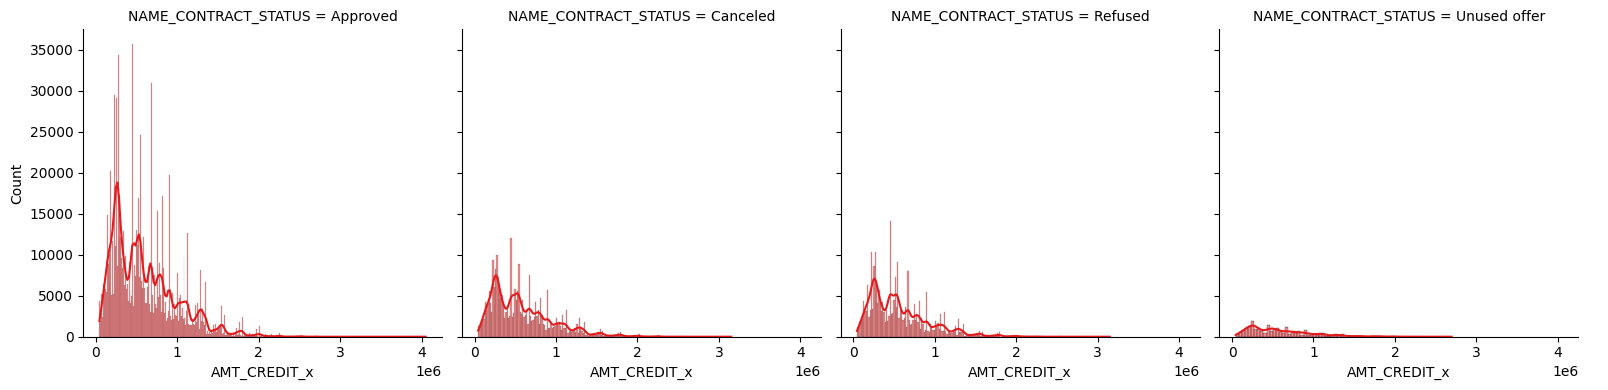

In [55]:
g = sns.FacetGrid(merged_data, col="NAME_CONTRACT_STATUS", col_wrap=4, height=4)
g.map(sns.histplot, 'AMT_CREDIT_x', kde=True)
g.add_legend()
plt.show()